In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('data/mobile_game_inapp_purchases.csv')

In [4]:
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49.0,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15.0,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23.0,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31.0,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01
4,aa7eec14-4846-47b9-b879-9c98038cda04,37.0,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05


In [5]:
df.shape

(3024, 13)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   UserID                         3024 non-null   object 
 1   Age                            2964 non-null   float64
 2   Gender                         2964 non-null   object 
 3   Country                        2964 non-null   object 
 4   Device                         2964 non-null   object 
 5   GameGenre                      2964 non-null   object 
 6   SessionCount                   3024 non-null   int64  
 7   AverageSessionLength           3024 non-null   float64
 8   SpendingSegment                3024 non-null   object 
 9   InAppPurchaseAmount            2888 non-null   float64
 10  FirstPurchaseDaysAfterInstall  2888 non-null   float64
 11  PaymentMethod                  2888 non-null   object 
 12  LastPurchaseDate               2888 non-null   o

In [7]:
df.describe()

,Age,SessionCount,AverageSessionLength,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall
count,2964.000000,3024.000000,3024.000000,2888.000000,2888.000000
mean,33.533738,10.074735,20.073978,102.582864,15.384003
std,11.992258,3.115863,8.585208,454.339708,8.946191
min,13.000000,1.000000,5.010000,0.000000,0.000000
25%,23.000000,8.000000,12.680000,5.987500,8.000000
50%,33.000000,10.000000,20.315000,11.975000,16.000000
75%,44.000000,12.000000,27.420000,17.762500,23.000000
max,54.000000,22.000000,34.990000,4964.450000,30.000000


In [8]:
df.isna().sum()

UserID                             0
Age                               60
Gender                            60
Country                           60
Device                            60
GameGenre                         60
SessionCount                       0
AverageSessionLength               0
SpendingSegment                    0
InAppPurchaseAmount              136
FirstPurchaseDaysAfterInstall    136
PaymentMethod                    136
LastPurchaseDate                 136
dtype: int64

In [9]:
#Handling Missing Value 

df['Age'].fillna(df['Age'].median(), inplace=True)
df['InAppPurchaseAmount'].fillna(df['InAppPurchaseAmount'].median(), inplace=True)
df['FirstPurchaseDaysAfterInstall'].fillna(df['FirstPurchaseDaysAfterInstall'].median(), inplace=True)

categorical_cols_with_na = ['Gender', 'Country', 'Device', 'GameGenre', 'PaymentMethod', 'LastPurchaseDate']
for col in categorical_cols_with_na:
    df[col].fillna('Unknown', inplace=True)

print("Missing values have been imputed with a more robust strategy.")
df.isna().sum()

Missing values have been imputed with a more robust strategy.


UserID                           0
Age                              0
Gender                           0
Country                          0
Device                           0
GameGenre                        0
SessionCount                     0
AverageSessionLength             0
SpendingSegment                  0
InAppPurchaseAmount              0
FirstPurchaseDaysAfterInstall    0
PaymentMethod                    0
LastPurchaseDate                 0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.nunique()

UserID                           3024
Age                                42
Gender                              4
Country                            28
Device                              3
GameGenre                          16
SessionCount                       21
AverageSessionLength             1915
SpendingSegment                     3
InAppPurchaseAmount              1840
FirstPurchaseDaysAfterInstall      31
PaymentMethod                       8
LastPurchaseDate                  226
dtype: int64

In [12]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['Gender'].unique())

print("Categories in 'Device' variable:  ",end=" ")
print(df['Device'].unique())


Categories in 'gender' variable:      ['Male' 'Female' 'Other' 'Unknown']
Categories in 'Device' variable:   ['Android' 'iOS' 'Unknown']


In [13]:
# Convert 'LastPurchaseDate' to datetime objects
df['LastPurchaseDate'] = pd.to_datetime(df['LastPurchaseDate'], errors='coerce')

# Convert float columns to integers
df['Age'] = df['Age'].astype('int64')
df['SessionCount'] = df['SessionCount'].astype('int64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         3024 non-null   object        
 1   Age                            3024 non-null   int64         
 2   Gender                         3024 non-null   object        
 3   Country                        3024 non-null   object        
 4   Device                         3024 non-null   object        
 5   GameGenre                      3024 non-null   object        
 6   SessionCount                   3024 non-null   int64         
 7   AverageSessionLength           3024 non-null   float64       
 8   SpendingSegment                3024 non-null   object        
 9   InAppPurchaseAmount            3024 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  3024 non-null   float64       
 11  PaymentMethod    

In [16]:
# Extract features from the 'LastPurchaseDate'
df['LastPurchaseYear'] = df['LastPurchaseDate'].dt.year
df['LastPurchaseMonth'] = df['LastPurchaseDate'].dt.month
df['LastPurchaseDayOfWeek'] = df['LastPurchaseDate'].dt.dayofweek # Monday=0, Sunday=6

# Display the first few rows with the new columns
df.head()

,UserID,Age,Gender,Country,Device,GameGenre,SessionCount,AverageSessionLength,SpendingSegment,InAppPurchaseAmount,FirstPurchaseDaysAfterInstall,PaymentMethod,LastPurchaseDate,LastPurchaseYear,LastPurchaseMonth,LastPurchaseDayOfWeek
0,c9889ab0-9cfc-4a75-acd9-5eab1df0015c,49,Male,Norway,Android,Battle Royale,9,12.83,Minnow,11.40,28.0,Apple Pay,2025-03-19,2025.0,3.0,2.0
1,7c9e413c-ecca-45f2-a780-2826a07952a2,15,Male,Switzerland,iOS,Action RPG,11,19.39,Minnow,6.37,18.0,Debit Card,2025-06-08,2025.0,6.0,6.0
2,fd61e419-1a92-4f43-a8c7-135842ad328a,23,Male,China,Android,Fighting,9,8.87,Minnow,15.81,30.0,Apple Pay,2025-06-02,2025.0,6.0,0.0
3,bdb7f6d1-ff9a-468c-afe7-43f32a94293e,31,Male,Mexico,Android,Racing,12,19.56,Minnow,13.49,9.0,Debit Card,2025-04-01,2025.0,4.0,1.0
4,aa7eec14-4846-47b9-b879-9c98038cda04,37,Female,India,Android,Battle Royale,10,15.23,Minnow,10.86,15.0,Paypal,2025-05-05,2025.0,5.0,0.0


In [17]:
# Correct the data type for the remaining float column
df['FirstPurchaseDaysAfterInstall'] = df['FirstPurchaseDaysAfterInstall'].astype('int64')

# The new date features we created will have nulls where the original date was NaT.
df['LastPurchaseYear'].fillna(df['LastPurchaseYear'].median(), inplace=True)
df['LastPurchaseMonth'].fillna(df['LastPurchaseMonth'].median(), inplace=True)
df['LastPurchaseDayOfWeek'].fillna(df['LastPurchaseDayOfWeek'].median(), inplace=True)

# Convert to integers
df['LastPurchaseYear'] = df['LastPurchaseYear'].astype('int64')
df['LastPurchaseMonth'] = df['LastPurchaseMonth'].astype('int64')
df['LastPurchaseDayOfWeek'] = df['LastPurchaseDayOfWeek'].astype('int64')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3024 entries, 0 to 3023
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   UserID                         3024 non-null   object        
 1   Age                            3024 non-null   int64         
 2   Gender                         3024 non-null   object        
 3   Country                        3024 non-null   object        
 4   Device                         3024 non-null   object        
 5   GameGenre                      3024 non-null   object        
 6   SessionCount                   3024 non-null   int64         
 7   AverageSessionLength           3024 non-null   float64       
 8   SpendingSegment                3024 non-null   object        
 9   InAppPurchaseAmount            3024 non-null   float64       
 10  FirstPurchaseDaysAfterInstall  3024 non-null   int64         
 11  PaymentMethod    

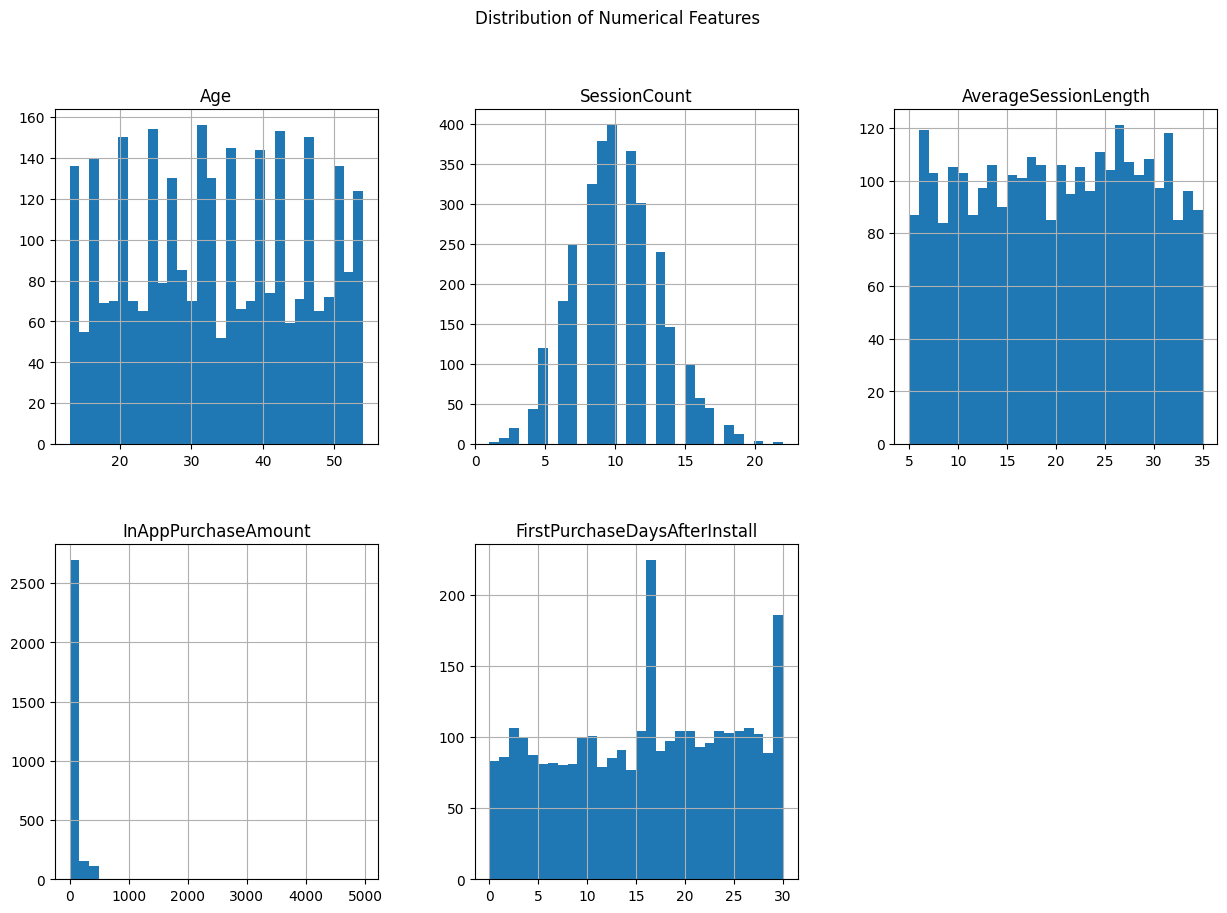

In [18]:
# Select numerical columns for plotting
numerical_cols = ['Age', 'SessionCount', 'AverageSessionLength', 'InAppPurchaseAmount', 'FirstPurchaseDaysAfterInstall']

df[numerical_cols].hist(bins=30, figsize=(15, 10), layout=(2, 3))
plt.suptitle('Distribution of Numerical Features')
plt.show()

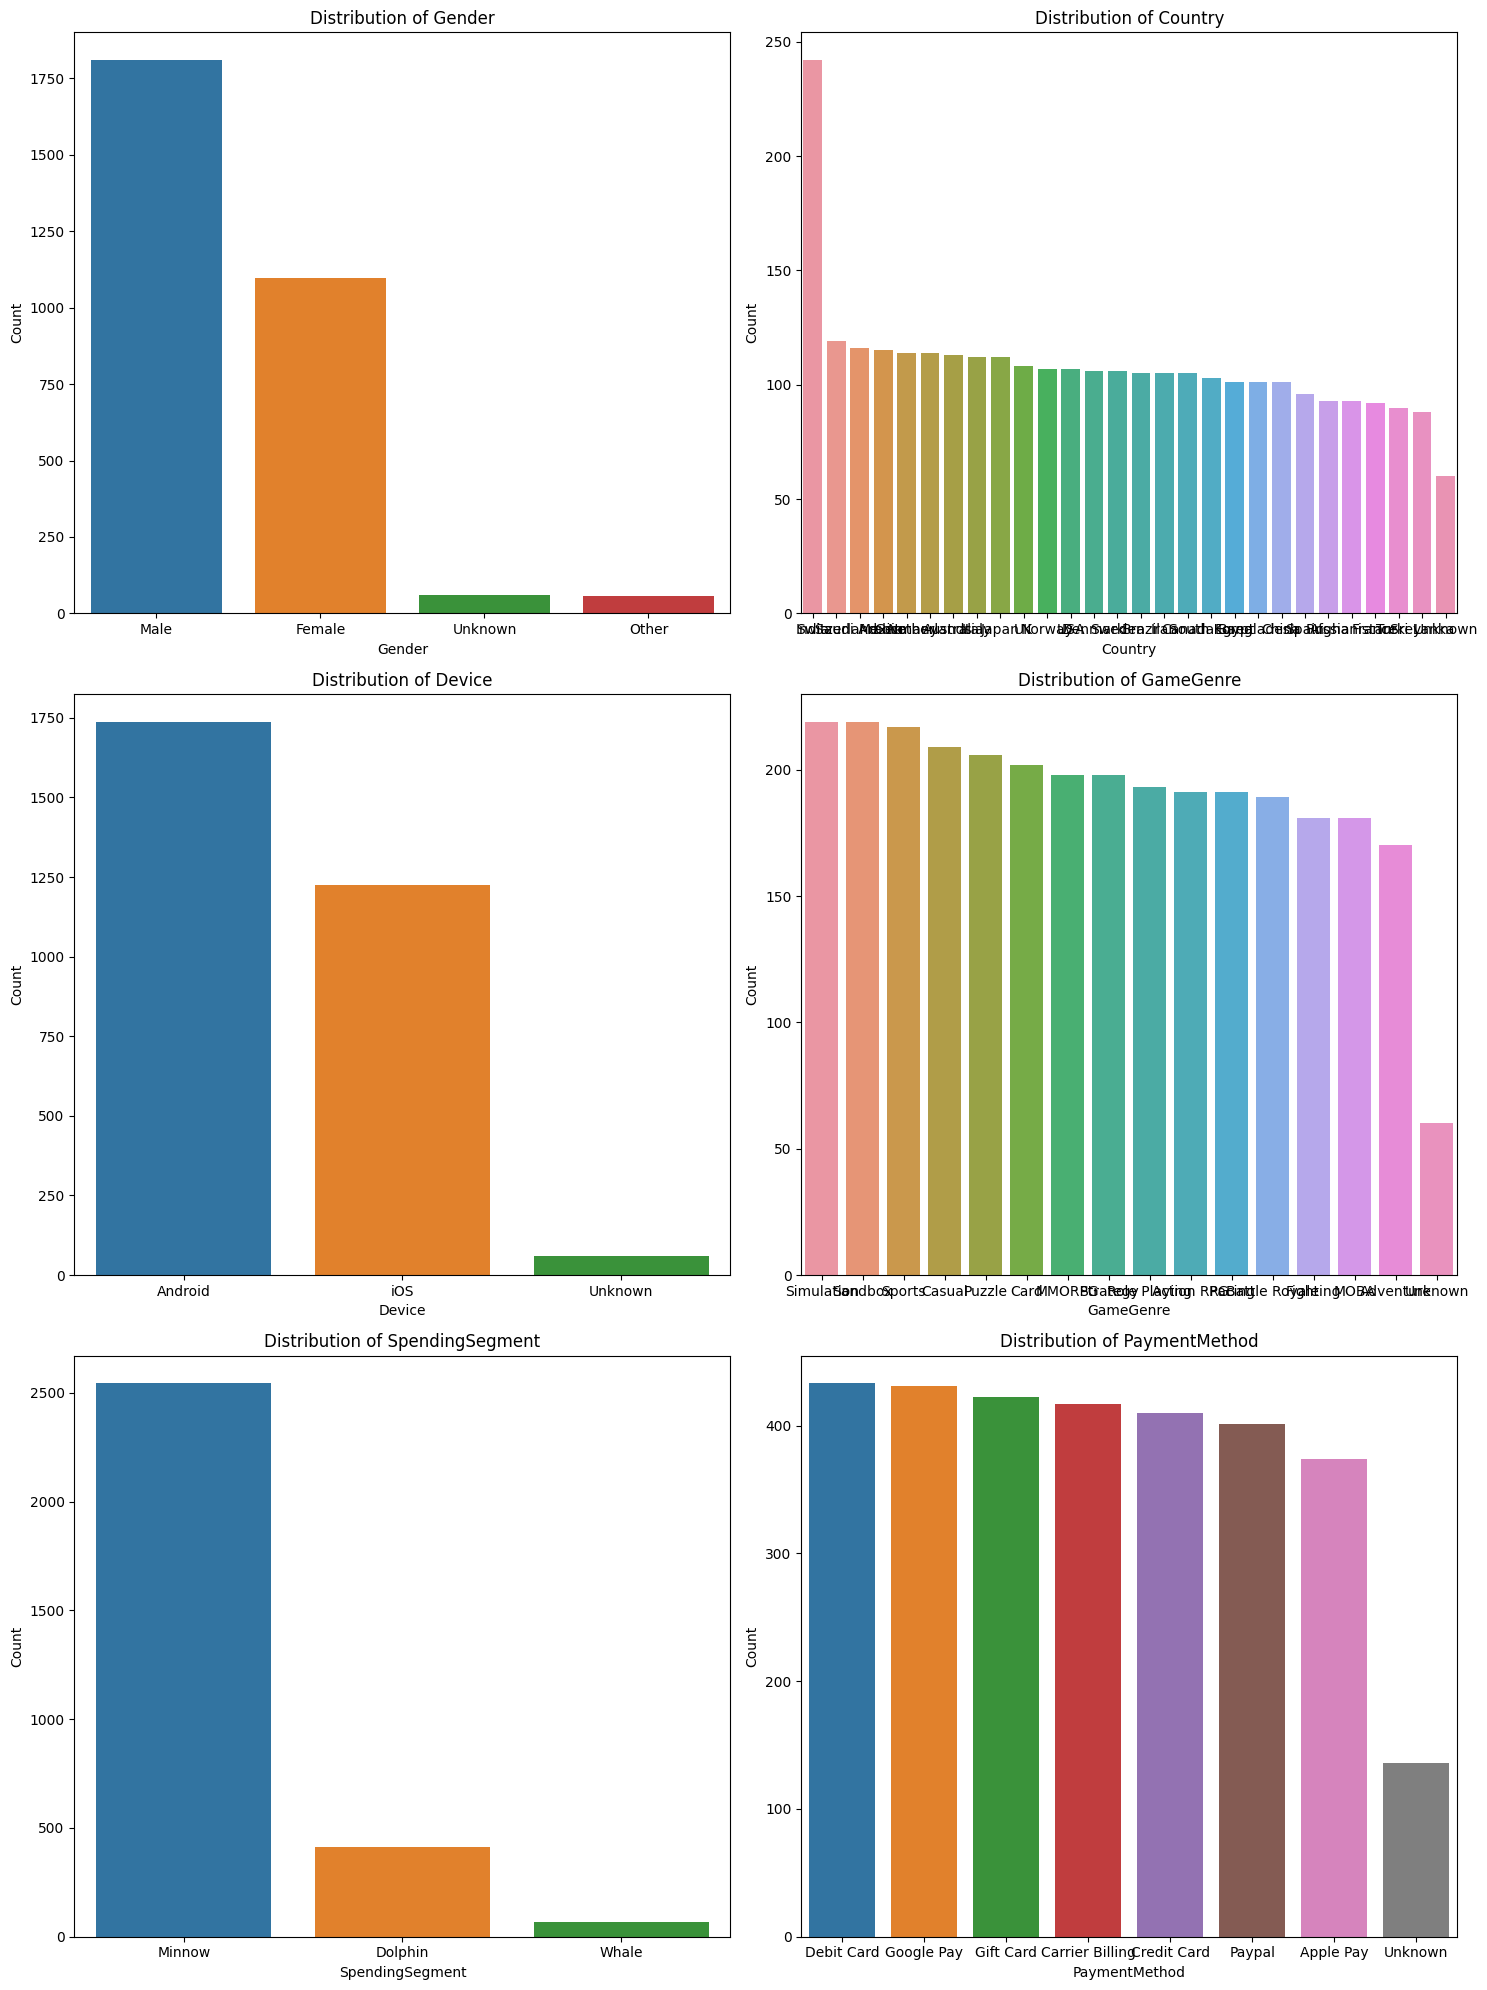

In [21]:
# Select key categorical columns for plotting
categorical_cols = ['Gender', 'Country', 'Device', 'GameGenre', 'SpendingSegment', 'PaymentMethod']

# Set up the plotting area
plt.figure(figsize=(15, 20))

# Loop through each categorical column and create a count plot
for i, col in enumerate(categorical_cols):
    plt.subplot(3, 2, i + 1)
    sns.countplot(x=df[col], order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [ ]:
gender_spending = df.groupby('Gender')['InAppPurchaseAmount'].mean().sort_values(ascending=False)
print("Average Spending per Gender:")
print(gender_spending)

Average Spending per Gender:
Gender
Male       110.862586
Female      82.956061
Unknown     69.614583
Other       35.071429
Name: InAppPurchaseAmount, dtype: float64


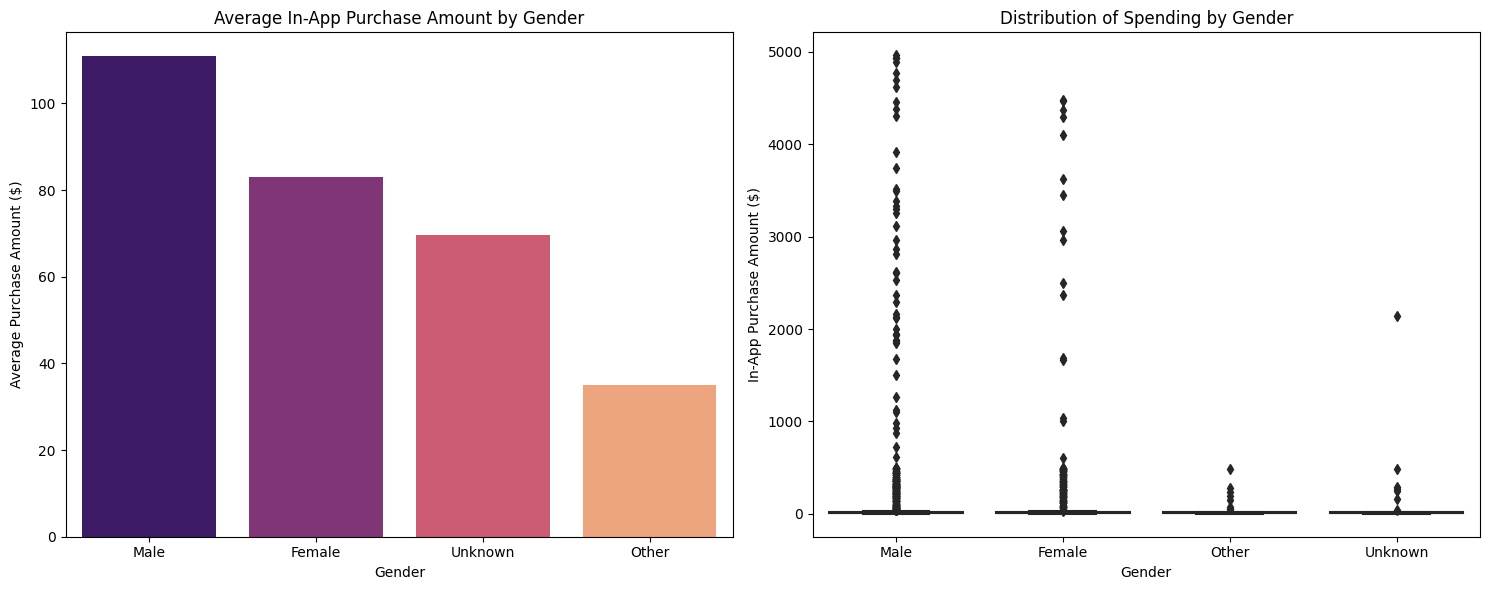

In [23]:
# Set up the plotting area with two subplots
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Subplot 1: Bar Plot of Average Spending
sns.barplot(x=gender_spending.index, y=gender_spending.values, ax=axes[0], palette='magma')
axes[0].set_title('Average In-App Purchase Amount by Gender')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Average Purchase Amount ($)')

# Subplot 2: Box Plot of Spending Distribution
sns.boxplot(x='Gender', y='InAppPurchaseAmount', data=df, ax=axes[1], palette='magma')
axes[1].set_title('Distribution of Spending by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('In-App Purchase Amount ($)')

plt.tight_layout()
plt.show()

In [24]:
# Group by the 'SpendingSegment' and calculate the mean of 'InAppPurchaseAmount'
segment_spending = df.groupby('SpendingSegment')['InAppPurchaseAmount'].mean().sort_values(ascending=False)

print("Average Spending per Segment:")
print(segment_spending)

Average Spending per Segment:
SpendingSegment
Whale      2582.985515
Dolphin     234.291990
Minnow       10.108724
Name: InAppPurchaseAmount, dtype: float64


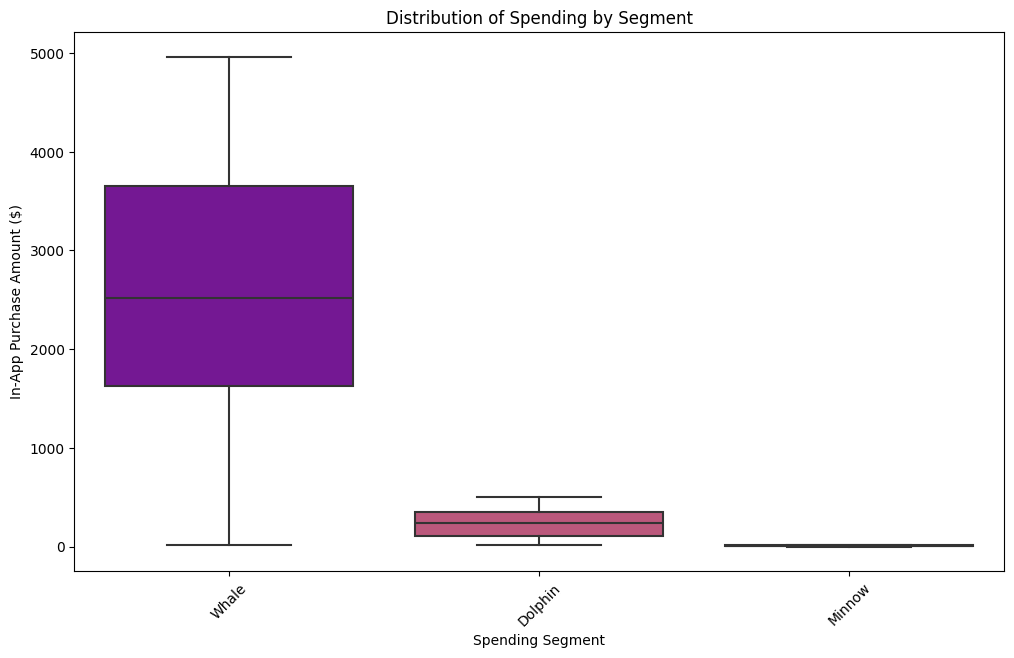

In [25]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='SpendingSegment', y='InAppPurchaseAmount', data=df, order=segment_spending.index, palette='plasma')
plt.title('Distribution of Spending by Segment')
plt.xlabel('Spending Segment')
plt.ylabel('In-App Purchase Amount ($)')
plt.xticks(rotation=45) 
plt.show()

In [26]:
# Group by 'GameGenre' and find the mean 'InAppPurchaseAmount'
genre_spending = df.groupby('GameGenre')['InAppPurchaseAmount'].mean().sort_values(ascending=False)

print("Average Spending per Game Genre:")
print(genre_spending)

Average Spending per Game Genre:
GameGenre
Racing           153.253063
Battle Royale    149.029312
Strategy         137.244419
MOBA             134.176740
Fighting         134.175110
Unknown          104.895917
MMORPG            93.758131
Adventure         92.989765
Role Playing      88.861710
Simulation        81.789886
Card              81.564233
Casual            75.919450
Sports            74.892742
Puzzle            70.046772
Sandbox           65.203881
Action RPG        61.106728
Name: InAppPurchaseAmount, dtype: float64


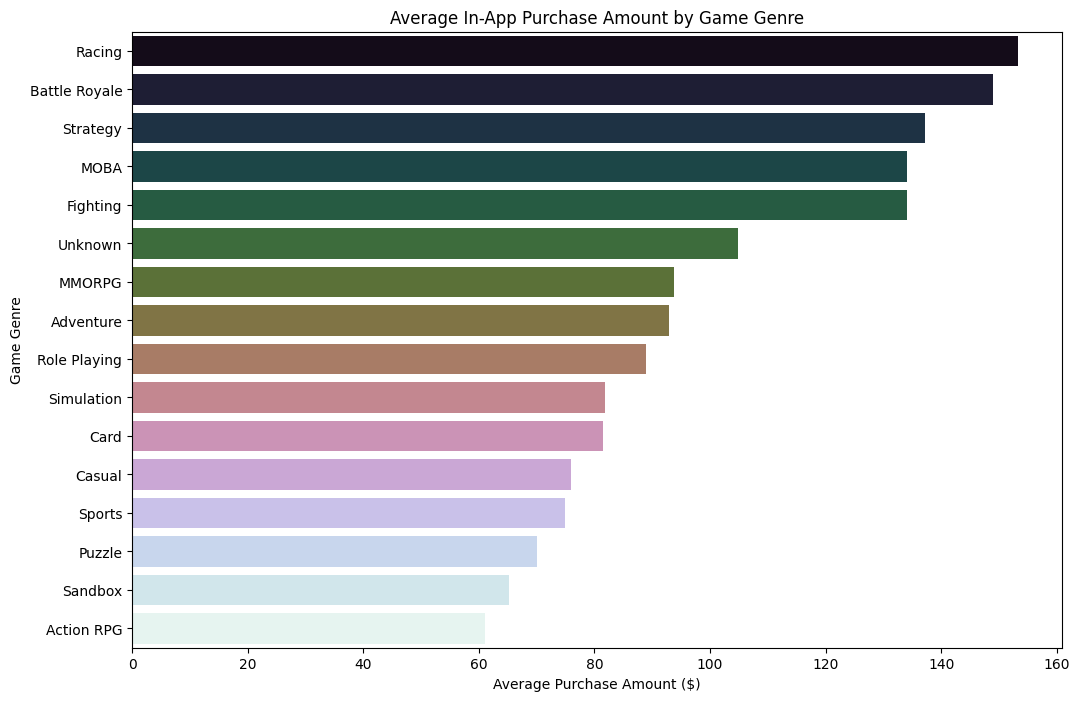

In [27]:
plt.figure(figsize=(12, 8))
sns.barplot(y=genre_spending.index, x=genre_spending.values, palette='cubehelix')

plt.title('Average In-App Purchase Amount by Game Genre')
plt.xlabel('Average Purchase Amount ($)')
plt.ylabel('Game Genre')
plt.show()

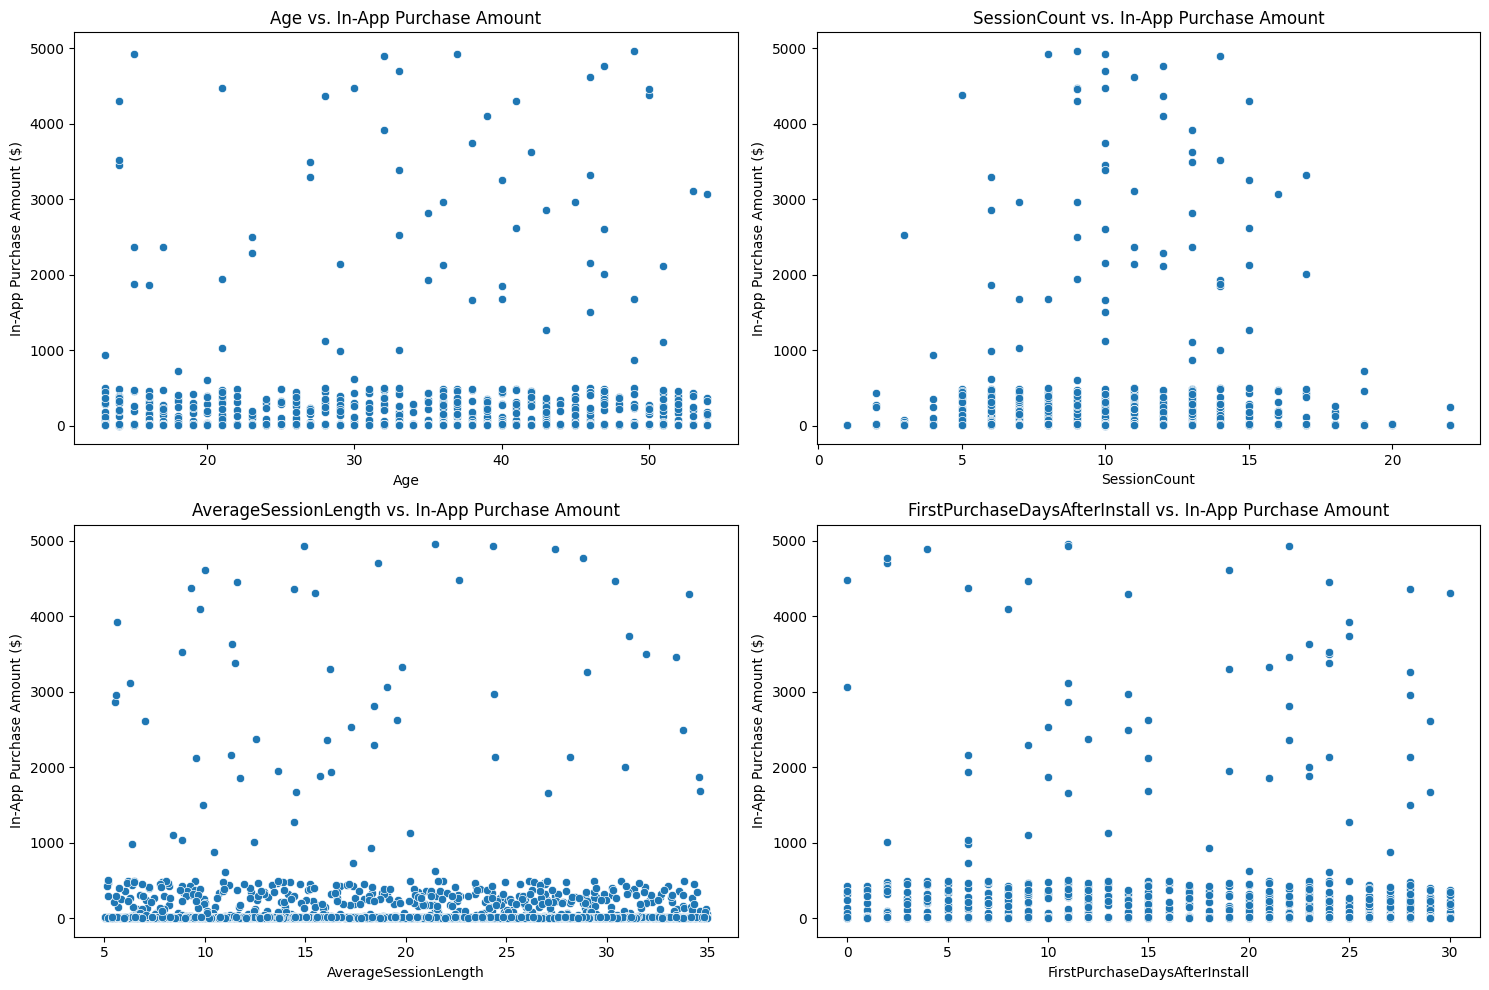

In [32]:
# List of numerical features to compare against InAppPurchaseAmount
numerical_features = ['Age', 'SessionCount', 'AverageSessionLength', 'FirstPurchaseDaysAfterInstall']

# Set up the plotting area
plt.figure(figsize=(15,10))

# Create a scatter plot for each numerical feature vs. InAppPurchaseAmount
for i, col in enumerate(numerical_features):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x=df[col], y=df['InAppPurchaseAmount'])
    plt.title(f'{col} vs. In-App Purchase Amount')
    plt.xlabel(col)
    plt.ylabel('In-App Purchase Amount ($)')

plt.tight_layout()
plt.show()

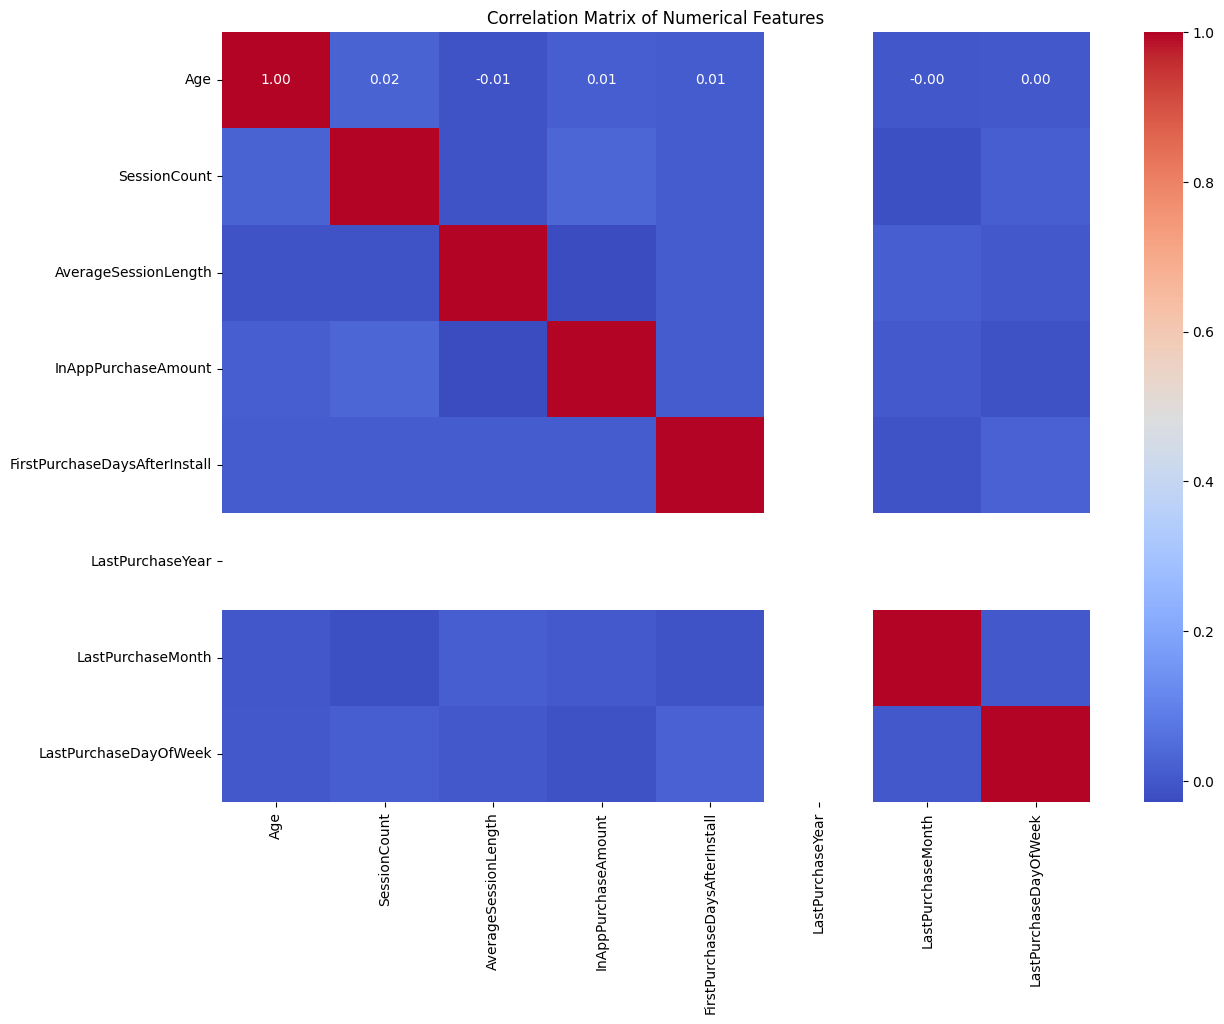

In [29]:
# Select all numerical columns for the correlation matrix
all_numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Calculate the correlation matrix
correlation_matrix = df[all_numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()